# 可计量的社会·开课问卷分析
**作者：**何濯羽

**日期：**2024年10月21日

**Python版本：**3.11.4（可使用`! python --version`检查自己的Python版本）


## 第一步：导入“包”

In [1]:
import pandas as pd                   # 数据清理
import numpy as np                    # 数学运算

import matplotlib
import matplotlib.pyplot as plt       # 绘图
import matplotlib.font_manager as fm  # 特殊字体
matplotlib.rcParams['font.family'] = ['Microsoft YaHei']  # 设定中文字体：微软雅黑

## 第二步：导入原始数据

In [2]:
ques = pd.read_excel('Questionnaire.xlsx')
ques.head(3)

,序号,提交答卷时间,所用时间,来源,来源详情,来自IP,1、你高考时的外语科目是什么？,2、你高考时的外语成绩是多少？,3、你对以下哪个国家/地区的社会研究最感兴趣？,4、你使用过以下哪些统计软件或编程语言？(Excel),...,6、(留学升本/升硕),6、(考公务员),6、(考编制),6、(考教师资格证),6、(出国实习/就业),6、(大学生创业),7、你的姓名是,8、你的学号是,9、你的学院是,10、你的专业班级是
0,1,2024/9/14 20:08:42,49秒,微信,NaN,171.218.236.18(四川-成都),1,99,1,1,...,0,0,0,0,0,1,张三,2302,3,财务管理23207
1,2,2024/9/14 20:08:51,66秒,微信,NaN,171.219.218.96(四川-成都),1,124,6,1,...,1,0,0,0,0,0,李四,2304,5,英语23206
2,3,2024/9/14 20:08:58,65秒,微信,NaN,171.218.225.73(四川-成都),1,104,1,0,...,0,0,0,0,0,1,王五,2203,4,数媒艺术23201


## 第三步：清理数据
### 3.1 重命名行标签（rename column labels）

In [3]:
ques.rename(columns={'序号':'num',
                     '提交答卷时间':'time',
                     '所用时间':'duration',
                     '来源':'source',
                     '来源详情':'source_detail',
                     '来自IP':'IP',
                     '1、你高考时的外语科目是什么？':'language',
                     '2、你高考时的外语成绩是多少？':'test_score',
                     '3、你对以下哪个国家/地区的社会研究最感兴趣？':'country',
                     '4、你使用过以下哪些统计软件或编程语言？(Excel)':'excel',
                     '4、(SAS)':'sas',
                     '4、(SPSS)':'spss',
                     '4、(R)':'r',
                     '4、(Python)':'python',
                     '4、(Stata)':'stata',
                     '4、(Julia)':'julia',
                     '4、(均没有)':'none',
                     '5、如果必须学习以下任一编程语言，你选择哪一个？':'learn_code',
                     '6、你对以下哪些未来规划感兴趣？(国内专升本)':'zsb',
                     '6、(留学升本/升硕)':'liu_xue',
                     '6、(考公务员)':'gwy',
                     '6、(考编制)':'bian_zhi',
                     '6、(考教师资格证)':'teacher',
                     '6、(出国实习/就业)':'intern',
                     '6、(大学生创业)':'startup',
                     '7、你的姓名是':'name',
                     '8、你的学号是':'id',
                     '9、你的学院是':'school',
                     '10、你的专业班级是':'class'
                     },
            inplace=True)
ques.head(3)

,num,time,duration,source,source_detail,IP,language,test_score,country,excel,...,liu_xue,gwy,bian_zhi,teacher,intern,startup,name,id,school,class
0,1,2024/9/14 20:08:42,49秒,微信,NaN,171.218.236.18(四川-成都),1,99,1,1,...,0,0,0,0,0,1,张三,2302,3,财务管理23207
1,2,2024/9/14 20:08:51,66秒,微信,NaN,171.219.218.96(四川-成都),1,124,6,1,...,1,0,0,0,0,0,李四,2304,5,英语23206
2,3,2024/9/14 20:08:58,65秒,微信,NaN,171.218.225.73(四川-成都),1,104,1,0,...,0,0,0,0,0,1,王五,2203,4,数媒艺术23201


### 3.2 丢弃无用列（drop useless columns）

In [4]:
ques = ques.drop(labels=['num', 'time', 'duration', 'source', 'source_detail', 'IP'], axis=1)
ques.head(3)

,language,test_score,country,excel,sas,spss,r,python,stata,julia,...,liu_xue,gwy,bian_zhi,teacher,intern,startup,name,id,school,class
0,1,99,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,张三,2302,3,财务管理23207
1,1,124,6,1,0,0,0,0,0,0,...,1,0,0,0,0,0,李四,2304,5,英语23206
2,1,104,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,王五,2203,4,数媒艺术23201


### 3.3 数值替换为文字（replace values with texts）

In [5]:
ques['language'] = ques['language'].replace({1:'English', 2:'Japanese'})

ques['country'] = ques['country'].replace({1:'China',
                                           2:'Japan & Korea',
                                           3:'Southeast Asia',
                                           4:'USA',
                                           5:'South America',
                                           6:'Great Britain',
                                           7:'Spain',
                                           8:'Italy',
                                           9:'France & Germany',
                                           10:'North Europe',
                                           11:'Africa'})

ques['learn_code'] = ques['learn_code'].replace({1:'r', 2:'python', 3:'stata'})

ques['school'] = ques['school'].replace({1:'计软', 2:'智科', 3:'信管', 4:'数艺', 5:'外语', 6:'健康', 7:'高职'})

ques.head(3)

,language,test_score,country,excel,sas,spss,r,python,stata,julia,...,liu_xue,gwy,bian_zhi,teacher,intern,startup,name,id,school,class
0,English,99,China,1,0,0,0,0,0,0,...,0,0,0,0,0,1,张三,2302,信管,财务管理23207
1,English,124,Great Britain,1,0,0,0,0,0,0,...,1,0,0,0,0,0,李四,2304,外语,英语23206
2,English,104,China,0,0,0,0,0,0,0,...,0,0,0,0,0,1,王五,2203,数艺,数媒艺术23201


## 第四步：分析数据
### 4.1 你高考时的外语科目是什么？

In [6]:
# 数一数
ques['language'].value_counts()

English     21
Japanese     3
Name: language, dtype: int64

In [7]:
# 构建 DataFrame
df = pd.DataFrame({'language': ['English', 'Japanese'],
                   'count': [ques['language'].value_counts()['English'], ques['language'].value_counts()['Japanese']]})
df

,language,count
0,English,21
1,Japanese,3


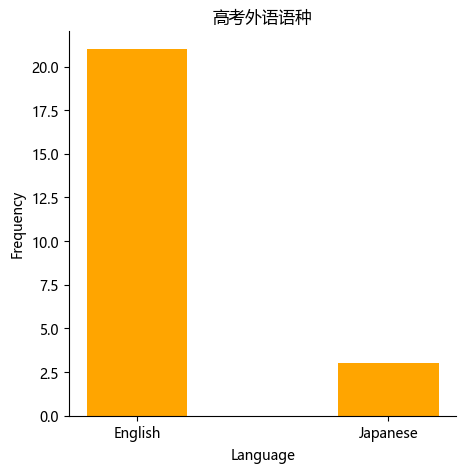

In [8]:
# 绘图
fig, ax = plt.subplots(figsize=(5,5))

ax.bar(df['language'], df['count'], color='orange', alpha=1.0, width=0.4)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('高考外语语种')
ax.set_xlabel('Language')
ax.set_ylabel('Frequency')

plt.show()

### 4.2 如果必须学习以下任一编程语言，你选择哪一个？

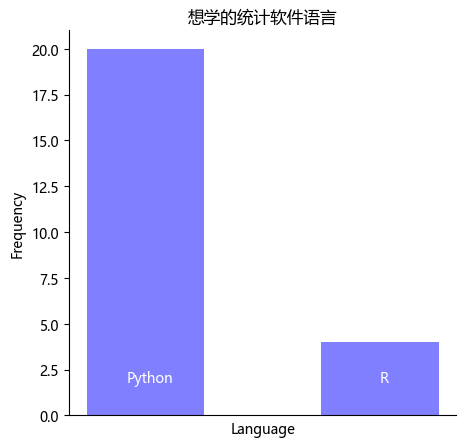

In [9]:
fig, ax = plt.subplots(figsize=(5,5))

ax.hist(ques['learn_code'], bins=2, color='blue', alpha=0.5, rwidth=0.5, density=False)

ax.set_ylabel('Frequency')
ax.set_xlabel('Language')
ax.set_title('想学的统计软件语言')

ax.text(0.21, 1.8, 'Python', color='white')
ax.text(0.75, 1.8, 'R', color='white')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

### 4.3 你对以下哪些未来规划感兴趣？

In [10]:
print('对留学感兴趣的学生比例是{0:4.2%}'.format(ques['liu_xue'].mean(numeric_only=True)))
print('对考公感兴趣的学生比例是{0:4.2%}'.format(ques['gwy'].mean(numeric_only=True)))
print('对考编感兴趣的学生比例是{0:4.2%}'.format(ques['bian_zhi'].mean(numeric_only=True)))
print('对考教资感兴趣的学生比例是{0:4.2%}'.format(ques['teacher'].mean(numeric_only=True)))
print('对出国实习/就业感兴趣的学生比例是{0:4.2%}'.format(ques['intern'].mean(numeric_only=True)))
print('对创业感兴趣的学生比例是{0:4.2%}'.format(ques['startup'].mean(numeric_only=True)))

对留学感兴趣的学生比例是20.83%
对考公感兴趣的学生比例是29.17%
对考编感兴趣的学生比例是25.00%
对考教资感兴趣的学生比例是16.67%
对出国实习/就业感兴趣的学生比例是8.33%
对创业感兴趣的学生比例是50.00%


## 第五步：导出我需要的数据

In [11]:
ques = ques[['name', 'id', 'school', 'class']]
ques = ques.sort_values(['school', 'class'])
ques.head(10)

,name,id,school,class
10,于十一,2312,信管,财务管理23204
0,张三,2302,信管,财务管理23207
16,楚十七,2322,信管,财务管理23207
17,唐十八,2332,信管,财务管理23207
21,彭二二,2342,信管,财务管理23207
22,岳二三,2352,信管,财务管理23214
4,杨七,2305,健康,医学影像23204
23,贾二四,2365,健康,医学影像23205
19,覃二十,2345,健康,医学影像23207
7,邓十,2315,健康,医学影像23211


In [12]:
ques.to_excel('student_list.xlsx', sheet_name='学生列表')